# Data Pre-Processing

### Importing all of the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn import preprocessing

sns.set()

In [2]:
import matplotlib
print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)

Pandas Version:  2.1.3
NumPy Version:  1.26.2
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
Scikit-Learn Version:  1.3.2


## Understanding the Data Type and Data Type Cleaning

In [3]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
print(dataset.shape)
dataset.head(10)

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### Variable Types (1)
- Categorical Variables

In [5]:
# Identifying object column and converting it to categorical variable
print(dataset.select_dtypes(["object"]).columns)

categorical = [
    "Suburb",
    "Address",
    "Type",
    "Method",
    "SellerG",
    "Date",
    "CouncilArea",
    "Regionname",
]

for cat_variables in categorical:
    dataset[cat_variables] = dataset[cat_variables].astype('category')

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [6]:
# Convert data column to date object
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)
dataset['Date'].head(5)

0   2016-09-03
1   2016-12-03
2   2016-02-04
3   2016-02-04
4   2017-03-04
Name: Date, dtype: category
Categories (78, datetime64[ns]): [2017-07-01, 2018-02-10, 2018-03-10, 2016-09-10, ..., 2017-07-08, 2016-10-08, 2017-09-09, 2017-12-09]

In [7]:
# Since postal code can be converted as categorical data type, thus
postal = ['Postcode']

for postcode in postal:
    dataset[postcode] = dataset[postcode].astype('category')

### Variable Types (2)
- Numerical Variables

In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


### Data Type Cleaning Result

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

## Data Cleaning

In data cleaning, we could use several methods to handle missing value, noisy, data, etc.

### Duplicate Columns

As you can see there are two columns that looked similar, which leads to ambiguity. Thus, I will check the `Rooms` and `Bedroom2` columns, whether it has a significance diffierence or not.

In [10]:
dataset['Duplicate Columns'] = dataset['Rooms'] - dataset['Bedroom2']
print("Rooms VS Bedroom2 (Average): ", dataset['Duplicate Columns'].mean())
print("Rooms VS Bedroom2 (Median): ", dataset['Duplicate Columns'].median())
dataset.head(10)

Rooms VS Bedroom2 (Average):  0.016253753753753753
Rooms VS Bedroom2 (Median):  0.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Duplicate Columns
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,0.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-08-06,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,1.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-08-06,2.5,3067.0,...,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,-2.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-08-06,2.5,3067.0,...,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0,-1.0


The result shows that there's no significance difference between these two, thus I will use the `Rooms` column instead

In [11]:
dataset = dataset.drop(['Bedroom2', 'Duplicate Columns'], axis=1)

In [12]:
dataset.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


### Missing Values

In [13]:
# Summary of missing values
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
# Average of missing values
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

It's shown that there are significant missing values for these columns: `Price`, `Bathroom`, `Car`, `Landsize`, `BuildingArea`, `YearBuilt`, `Lattitude`, and `Longtitude`

To make this analysis more comprehensive, we will fill the missing values with a measure of Central Tendency (Median), with exception for `Car`, `Latitude`, and `Longitude` which will be replaced with '0'

In [15]:
# Price NaN Values
print("Price")
print("Number of null values before replacement: ", dataset['Price'].isnull().sum())
dataset['Price'].fillna(dataset['Price'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['Price'].isnull().sum())
print(dataset['Price'].head())
print("--------------------------------\n")

# Bathroom NaN Values
print("Bathroom")
print("Number of null values before replacement: ", dataset['Bathroom'].isnull().sum())
dataset['Bathroom'].fillna(dataset['Bathroom'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['Bathroom'].isnull().sum())
print(dataset['Bathroom'].head())
print("--------------------------------\n")

# Car NaN Values
print("Car")
print("Number of null values before replacement: ", dataset['Car'].isnull().sum())
dataset['Car'].fillna(0, inplace=True)
print("Number of null values after replacement: ", dataset['Car'].isnull().sum())
print(dataset['Car'].head())
print("--------------------------------\n")

# Landsize NaN Values
print("Landsize")
print("Number of null values before replacement: ", dataset['Landsize'].isnull().sum())
dataset['Landsize'].fillna(dataset['Landsize'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['Landsize'].isnull().sum())
print(dataset['Landsize'].head())
print("--------------------------------\n")

# Building Area NaN Values
print("Building Area")
print("Number of null values before replacement: ", dataset['BuildingArea'].isnull().sum())
dataset['BuildingArea'].fillna(dataset['BuildingArea'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['BuildingArea'].isnull().sum())
print(dataset['BuildingArea'].head())
print("--------------------------------\n")

# YearBuilt Area NaN Values
print("Year Built")
print("Number of null values before replacement: ", dataset['YearBuilt'].isnull().sum())
dataset['YearBuilt'].fillna(dataset['YearBuilt'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['YearBuilt'].isnull().sum())
print(dataset['YearBuilt'].head())
print("--------------------------------\n")

# Lattitude NaN Values
print("Lattitude")
print("Number of null values before replacement: ", dataset['Lattitude'].isnull().sum())
dataset['Lattitude'].fillna(0, inplace=True)
print("Number of null values after replacement: ", dataset['Lattitude'].isnull().sum())
print(dataset['Lattitude'].head())
print("--------------------------------\n")

# Longtitude NaN Values
print("Longtitude")
print("Number of null values before replacement: ", dataset['Longtitude'].isnull().sum())
dataset['Longtitude'].fillna(0, inplace=True)
print("Number of null values after replacement: ", dataset['Longtitude'].isnull().sum())
print(dataset['Longtitude'].head())
print("--------------------------------\n")

Price
Number of null values before replacement:  7610
Number of null values after replacement:  0
0     870000.0
1    1480000.0
2    1035000.0
3     870000.0
4    1465000.0
Name: Price, dtype: float64
--------------------------------

Bathroom
Number of null values before replacement:  8226
Number of null values after replacement:  0
0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: Bathroom, dtype: float64
--------------------------------

Car
Number of null values before replacement:  8728
Number of null values after replacement:  0
0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Car, dtype: float64
--------------------------------

Landsize
Number of null values before replacement:  11810
Number of null values after replacement:  0
0    126.0
1    202.0
2    156.0
3      0.0
4    134.0
Name: Landsize, dtype: float64
--------------------------------

Building Area
Number of null values before replacement:  21115
Number of null values after replacement:  0
0    136.0
1    136.0
2 

In [16]:
# Verifying the missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          34857 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bathroom       34857 non-null  float64 
 11  Car            34857 non-null  float64 
 12  Landsize       34857 non-null  float64 
 13  BuildingArea   34857 non-null  float64 
 14  YearBuilt      34857 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Lattitude      34857 non-null  float64 
 17  Longtitude     34857 non-null  

### Outliers

#### Exploring the PDFs

We want to check the probability distribution function for each feature

In [17]:
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857.0,NaN,NaN,NaN,3.031012,0.969933,1.0,2.0,3.0,4.0,16.0
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,34857.0,NaN,NaN,NaN,1010837.798147,571999.150635,85000.0,695000.0,870000.0,1150000.0,11200000.0
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,2017-10-28 00:00:00,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856.0,NaN,NaN,NaN,11.184929,6.788892,0.0,6.4,10.3,14.0,48.1
Postcode,34856.0,211.0,3073.0,844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Price

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\983781003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'])


<Axes: xlabel='Price', ylabel='Density'>

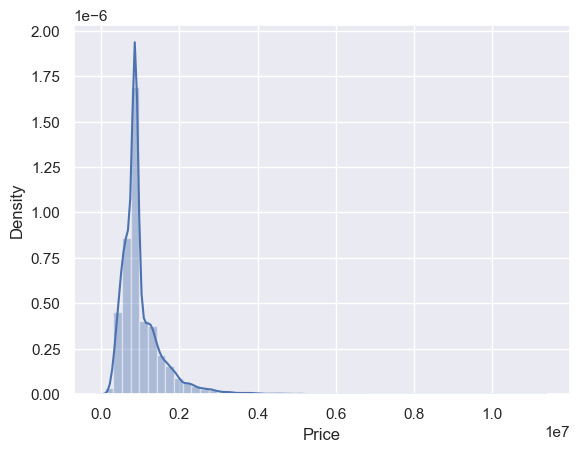

In [18]:
sns.distplot(dataset['Price'])

There's something odd in the price column, which is the mean of the price affected by the maximum price.

Below is the summary:
- Mean  = 1010799.70184
- Min   = 85000
- 25%   < 695000
- 50%   < 870000
- 75%   < 1150000
- Max   = 11200000

As you noticed, the differences between the minimum and the maximum price seem too high.

This issue could lead to the inflation of the house price. Thus, I want to remove the top 1% of observations using .quantile method

In [19]:
price_outliers = dataset['Price'].quantile(0.99)
dataset_cleaned_p1 = dataset[dataset['Price'] < price_outliers]
dataset_cleaned_p1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34506,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34506,33671,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34506.0,NaN,NaN,NaN,3.018316,0.960039,1.0,2.0,3.0,4.0,12.0
Type,34506,3,h,23636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,34506.0,NaN,NaN,NaN,978973.301513,468971.558632,85000.0,691000.0,870000.0,1130000.0,3220000.0
Method,34506,9,S,19537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34506,386,Jellis,3292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34506,78,2017-10-28 00:00:00,1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34505.0,NaN,NaN,NaN,11.225127,6.804422,0.0,6.4,10.4,14.0,48.1
Postcode,34505.0,211.0,3073.0,844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Now it's makes more sense :)**

Below is the summary:
- Mean  = 978935.325065
- Min   = 85000
- 25%   < 691000
- 50%   < 870000
- 75%   < 1130000
- Max   = 3220000

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\2537106526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_cleaned_p1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

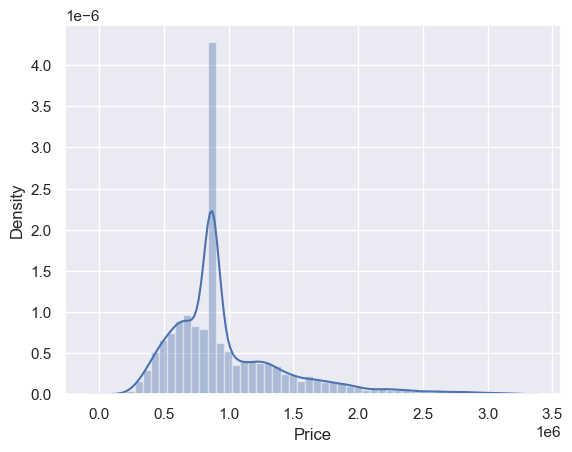

In [20]:
sns.distplot(dataset_cleaned_p1['Price'])

##### Rooms

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\1476913523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Rooms'])


<Axes: xlabel='Rooms', ylabel='Density'>

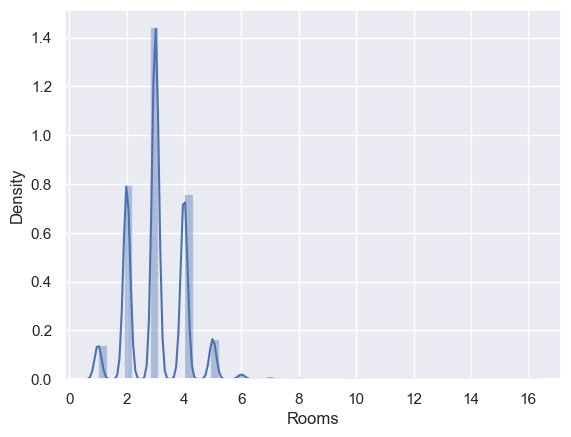

In [21]:
sns.distplot(dataset['Rooms'])

Wow, the outliers of the room seems not right. Let's do the same like the price

In [22]:
rooms_outliers = dataset_cleaned_p1['Rooms'].quantile(0.99)
dataset_cleaned_p2 = dataset_cleaned_p1[dataset_cleaned_p1['Rooms'] < rooms_outliers]
dataset_cleaned_p2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,32631,349,Reservoir,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,32631,31896,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,32631.0,NaN,NaN,NaN,2.893108,0.81484,1.0,2.0,3.0,3.0,4.0
Type,32631,3,h,21791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,32631.0,NaN,NaN,NaN,958146.417793,447967.502151,85000.0,680000.0,870000.0,1100000.0,3220000.0
Method,32631,9,S,18656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,32631,371,Nelson,3099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,32631,78,2017-10-28 00:00:00,1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,32630.0,NaN,NaN,NaN,11.119473,6.801422,0.0,6.3,10.3,13.9,48.1
Postcode,32630.0,211.0,3073.0,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\2699532222.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_cleaned_p2['Rooms'])


<Axes: xlabel='Rooms', ylabel='Density'>

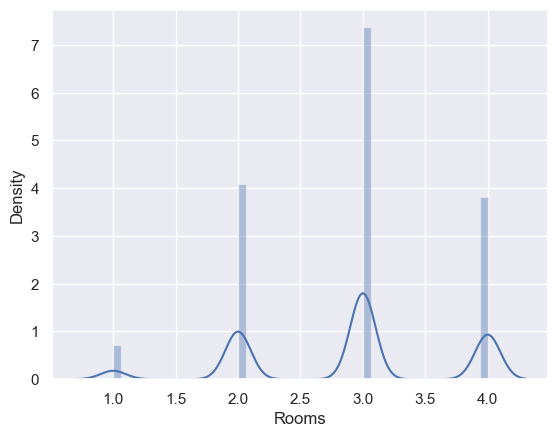

In [23]:
sns.distplot(dataset_cleaned_p2['Rooms'])

#### Fast Forward
However, since the last descriptive statistics giving too much information, I will took the "Abnormal" feature to be cleaned its outliers, as follows:
- `Bathroom`
- `Distance`
- `Car`

While the other feature that seems odd are:
- `BuildingArea`
- `LandSize`
- `YearBuilt`

The other feature will be calculated manually or filtered manually, since it's incompatible with .quantile method

In [24]:
abnormal_outliers = dataset_cleaned_p2[
    ["Bathroom", "Distance", "Car", "BuildingArea", "Landsize"]
].quantile(0.99)
dataset_cleaned_p3 = dataset_cleaned_p2[
    (dataset_cleaned_p2["Bathroom"] < abnormal_outliers[0])
    & (dataset_cleaned_p2["Distance"] < abnormal_outliers[1])
    & (dataset_cleaned_p2["Car"] < abnormal_outliers[2])
    & (dataset_cleaned_p2["BuildingArea"] < abnormal_outliers[3])
    & (dataset_cleaned_p2["Landsize"] < abnormal_outliers[4])
]
dataset_cleaned_p3.describe(include="all").transpose()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\1884871205.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (dataset_cleaned_p2["Bathroom"] < abnormal_outliers[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\1884871205.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  & (dataset_cleaned_p2["Distance"] < abnormal_outliers[1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\1884871205.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,29299,319,Reservoir,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,29299,28692,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,29299.0,NaN,NaN,NaN,2.832725,0.803841,1.0,2.0,3.0,3.0,4.0
Type,29299,3,h,19004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,29299.0,NaN,NaN,NaN,939005.415168,426978.151542,85000.0,669000.0,870000.0,1075000.0,3200000.0
Method,29299,9,S,16929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,29299,351,Nelson,2851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,29299,78,2017-10-28 00:00:00,904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,29299.0,NaN,NaN,NaN,10.737216,6.130495,0.0,6.3,10.1,13.9,35.2
Postcode,29299.0,189.0,3073.0,765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploring the Outliers using other statistical method

<Axes: >

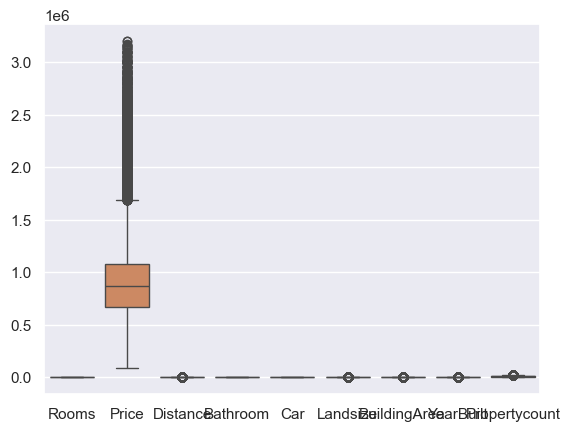

In [25]:
# Detecting the outliers using boxplot
sns.boxplot(
    dataset_cleaned_p3[
        [
            "Rooms",
            "Price",
            "Distance",
            "Bathroom",
            "Car",
            "Landsize",
            "BuildingArea",
            "YearBuilt",
            "Propertycount",
        ]
    ]
)

As you can see from the descriptive statistics above, several things seem too odd, such as the outlier on `Price` and `Landsize`.

However, it will make sense if a house has zero `LandSize` and I will assume it is a "Zero-lot-line" home, but it will not make sense if a house has a '0' `BuildingArea`. Other than that, the maximum of `YearBuilt` is '2106', so this issue does not make any sense at all.

Thus, we will remove all of the observations that have:
- `YearBuilt`       > 2023
- `BuildingArea`    = 0

In [26]:
# Finding the "Bad" data, which is the BuildingArea with 0 value
dataset_cleaned_p3[dataset_cleaned_p3['BuildingArea'] == 0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-03-04,2.3,3051.0,1.0,1.0,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-09-03,12.1,3083.0,1.0,2.0,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0
20038,Heidelberg Heights,8 Thames St,3,h,870000.0,SN,Miles,2017-09-03,8.8,3081.0,1.0,2.0,658.0,0.0,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947.0
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-09-03,20.6,3064.0,2.0,2.0,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-09-03,7.0,3071.0,2.0,2.0,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0
21155,Elwood,6/31 Beach Av,2,u,735000.0,S,Buxton,2017-09-16,7.2,3184.0,1.0,2.0,521.0,0.0,1960.0,Port Phillip City Council,-37.88646,144.98491,Southern Metropolitan,8989.0
21510,Roxburgh Park,109 Rossiter Av,3,h,870000.0,SN,Barry,2017-09-16,20.6,3064.0,2.0,2.0,647.0,0.0,2000.0,Hume City Council,-37.63211,144.92587,Northern Metropolitan,5833.0
21742,Brunswick West,10/13 Peacock St,2,u,461500.0,SP,Jellis,2017-08-19,5.2,3055.0,1.0,1.0,521.0,0.0,1970.0,Moreland City Council,-37.75718,144.94024,Northern Metropolitan,7082.0
21858,Essendon,6/4 Balmoral St,2,u,491000.0,S,Barry,2017-08-19,7.5,3040.0,1.0,1.0,521.0,0.0,1984.0,Moonee Valley City Council,-37.75018,144.90647,Western Metropolitan,9264.0
21868,Fitzroy,478 George St,3,h,870000.0,S,Collins,2017-08-19,2.1,3065.0,1.0,1.0,274.0,0.0,1905.0,Yarra City Council,-37.79557,144.98266,Northern Metropolitan,5825.0


In [27]:
# Finding the outlier of YearBuilt
dataset_cleaned_p3[dataset_cleaned_p3['YearBuilt'] >= 2023]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,870000.0,SP,Ray,2016-11-07,11.8,3105.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0


In [28]:
# Taking out of these outliers
dataset_cleaned_p4 = dataset_cleaned_p3[dataset_cleaned_p3['YearBuilt'] <= 2023]
dataset_cleaned = dataset_cleaned_p4[dataset_cleaned_p4['BuildingArea'] != 0]

# Descriptive Statistics of dataset
dataset_cleaned.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,29238,319,Reservoir,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,29238,28635,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,29238.0,NaN,NaN,NaN,2.832102,0.803905,1.0,2.0,3.0,3.0,4.0
Type,29238,3,h,18954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,29238.0,NaN,NaN,NaN,939008.094227,426992.266625,85000.0,670000.0,870000.0,1075000.0,3200000.0
Method,29238,9,S,16893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,29238,351,Nelson,2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,29238,78,2017-10-28 00:00:00,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,29238.0,NaN,NaN,NaN,10.732372,6.127501,0.0,6.3,10.1,13.9,35.2
Postcode,29238.0,189.0,3073.0,764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Reduction
### Feature Selection

In [29]:
# Removing unnecessary features
dataset_cleaned.drop(columns=['Address'], inplace=True)
dataset_cleaned.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\3253410189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned.drop(columns=['Address'], inplace=True)


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,870000.0,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,870000.0,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [30]:
# Confirming the total amount of columns used now
dataset_cleaned.shape

(29238, 19)

In [31]:
# Resetting the index
dataset_cleaned.reset_index(drop=True, inplace=True)
dataset_cleaned

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,870000.0,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,3,u,870000.0,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29233,Yarraville,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,136.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
29234,Yarraville,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
29235,Yarraville,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
29236,Yarraville,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,2.0,0.0,521.0,136.0,1970.0,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0


In [32]:
dataset_cleaned.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,29238,319,Reservoir,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,29238.0,NaN,NaN,NaN,2.832102,0.803905,1.0,2.0,3.0,3.0,4.0
Type,29238,3,h,18954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,29238.0,NaN,NaN,NaN,939008.094227,426992.266625,85000.0,670000.0,870000.0,1075000.0,3200000.0
Method,29238,9,S,16893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,29238,351,Nelson,2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,29238,78,2017-10-28 00:00:00,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,29238.0,NaN,NaN,NaN,10.732372,6.127501,0.0,6.3,10.1,13.9,35.2
Postcode,29238.0,189.0,3073.0,764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathroom,29238.0,NaN,NaN,NaN,1.58359,0.496084,0.0,1.0,2.0,2.0,2.0


In [33]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29238 entries, 0 to 29237
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         29238 non-null  category
 1   Rooms          29238 non-null  int64   
 2   Type           29238 non-null  category
 3   Price          29238 non-null  float64 
 4   Method         29238 non-null  category
 5   SellerG        29238 non-null  category
 6   Date           29238 non-null  category
 7   Distance       29238 non-null  float64 
 8   Postcode       29238 non-null  category
 9   Bathroom       29238 non-null  float64 
 10  Car            29238 non-null  float64 
 11  Landsize       29238 non-null  float64 
 12  BuildingArea   29238 non-null  float64 
 13  YearBuilt      29238 non-null  float64 
 14  CouncilArea    29236 non-null  category
 15  Lattitude      29238 non-null  float64 
 16  Longtitude     29238 non-null  float64 
 17  Regionname     29236 non-null  

## New Dataset

In [34]:
dataset_cleaned.to_csv('MELBOURNE_CLEANED_DATASET.csv', index=False)